# Mobile Price Classification

## Problem

Prabhat Doongarwal ( popular as â€œpdâ€ ) has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Prabhat wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

URL: https://www.techgig.com/practice/question/mobile-price-classification/MFNGSFNFY1dLK2FoVTV4WXcrTDRVVzNoaHlndjhpR05QU2RUdnlIQTJOUT0=/1

## Solution

A classification model to predict a price range indicating how high the price is

## Intended Audience

Mobile companies who wants to estimate the price for their mobiles that they are going to launch

# Importing standard python libraries

In [1]:
# general libraries
import io, os, sys, types, time, datetime, math, random, requests, subprocess, StringIO, tempfile

# Importing packages required for pre-processing and analysis

In [2]:
# Data Manipulation
import numpy as np
import pandas as pd

from numpy import sort

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

# test and train split
from sklearn.model_selection import train_test_split

# Machine learning
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from catboost import CatBoostClassifier, CatBoostRegressor, CatboostError
#from xgboost import XGBClassifier

# Features selection
from sklearn.feature_selection import SelectFromModel

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc,confusion_matrix,log_loss

# Managing Warnings
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

## Reading the datasets

In [3]:
train=pd.read_csv('train.csv')

In [4]:
test=pd.read_csv('test.csv')

# Verify the data

In [5]:
train.columns

Index([u'battery_power', u'blue', u'clock_speed', u'dual_sim', u'fc',
       u'four_g', u'int_memory', u'm_dep', u'mobile_wt', u'n_cores', u'pc',
       u'px_height', u'px_width', u'ram', u'sc_h', u'sc_w', u'talk_time',
       u'three_g', u'touch_screen', u'wifi', u'price_range'],
      dtype='object')

In [6]:
test.columns

Index([u'id', u'battery_power', u'blue', u'clock_speed', u'dual_sim', u'fc',
       u'four_g', u'int_memory', u'm_dep', u'mobile_wt', u'n_cores', u'pc',
       u'px_height', u'px_width', u'ram', u'sc_h', u'sc_w', u'talk_time',
       u'three_g', u'touch_screen', u'wifi'],
      dtype='object')

In [7]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [9]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [10]:
test.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [11]:
print ('The train data has {0} rows and {1} columns'.format(train.shape[0],train.shape[1]))

The train data has 2000 rows and 21 columns


In [12]:
print ('The test data has {0} rows and {1} columns'.format(test.shape[0],test.shape[1]))

The test data has 1000 rows and 21 columns


In [13]:
# Displaying the size of the Dataframe in Memory
def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("Bytes", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

In [14]:
print "size of dataframe is: ",convert_size(train.memory_usage().sum())

size of dataframe is:  328.2 KB


In [15]:
print "size of dataframe is: ",convert_size(test.memory_usage().sum())

size of dataframe is:  164.13 KB


In [16]:
# Describing all the Numerical Features
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
# Describing all the Numerical Features
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [18]:
# find the column nams where data is missing
train.columns[train.isnull().any()]

Index([], dtype='object')

In [19]:
#print ('The data is missing in {1} columns out of {0} '.format(len(train.columns),len(train.columns)-len(train.columns[train.isnull().any()])))

In [20]:
# find the column nams where data is missing
test.columns[test.isnull().any()]

Index([], dtype='object')

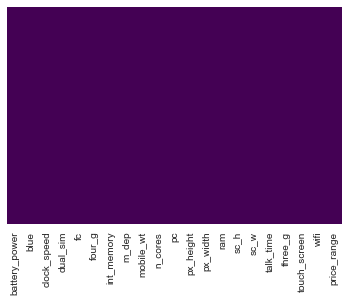

In [21]:
sns.heatmap(train.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

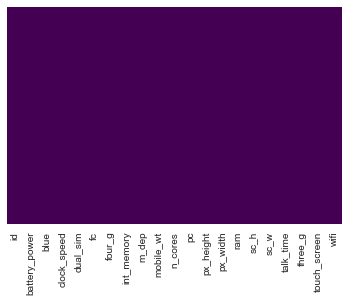

In [22]:
sns.heatmap(test.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [23]:
train.price_range.unique() 

array([1, 2, 3, 0], dtype=int64)

In [24]:
train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

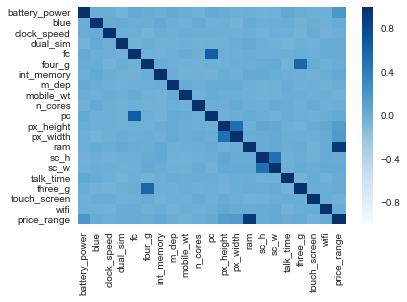

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(train.corr(),cmap='Blues',annot=False) 

## Analyze the correlation between features

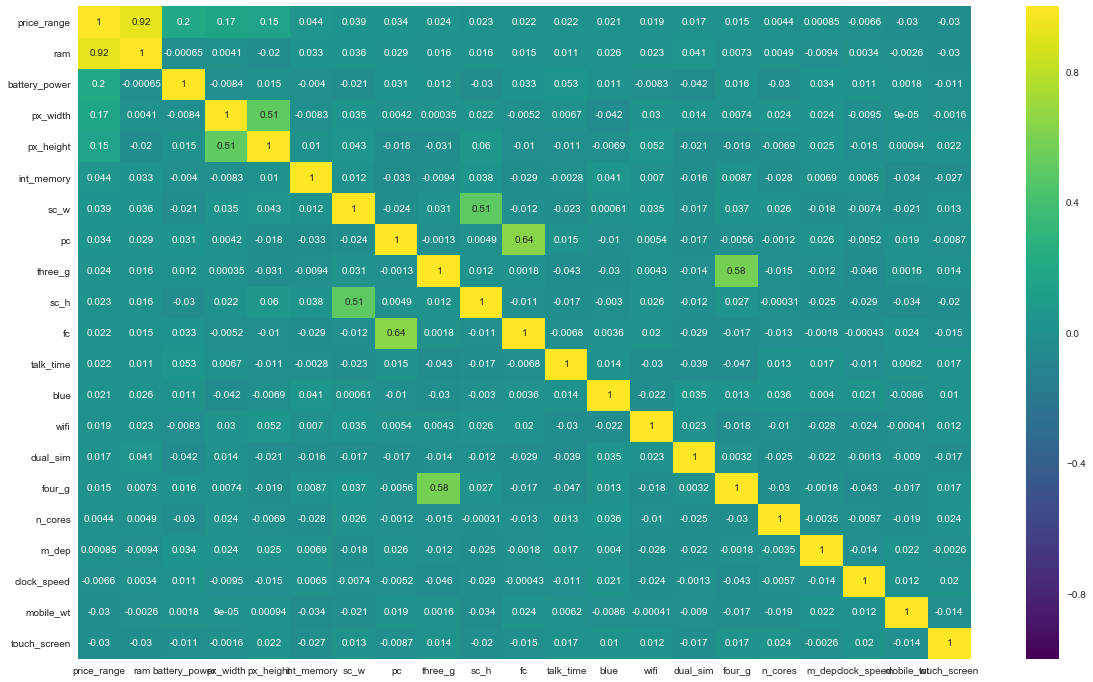

In [26]:
#Quality correlation matrix
k = 21 #number of variables for heatmap
cols = train.corr().nlargest(k, 'price_range')['price_range'].index
cm = train[cols].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [27]:
corr = train.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1,0.011,0.011,-0.042,0.033,0.016,-0.004,0.034,0.0018,-0.03,0.031,0.015,-0.0084,-0.00065,-0.03,-0.021,0.053,0.012,-0.011,-0.0083,0.2
blue,0.011,1,0.021,0.035,0.0036,0.013,0.041,0.004,-0.0086,0.036,-0.01,-0.0069,-0.042,0.026,-0.003,0.00061,0.014,-0.03,0.01,-0.022,0.021
clock_speed,0.011,0.021,1,-0.0013,-0.00043,-0.043,0.0065,-0.014,0.012,-0.0057,-0.0052,-0.015,-0.0095,0.0034,-0.029,-0.0074,-0.011,-0.046,0.02,-0.024,-0.0066
dual_sim,-0.042,0.035,-0.0013,1,-0.029,0.0032,-0.016,-0.022,-0.009,-0.025,-0.017,-0.021,0.014,0.041,-0.012,-0.017,-0.039,-0.014,-0.017,0.023,0.017
fc,0.033,0.0036,-0.00043,-0.029,1,-0.017,-0.029,-0.0018,0.024,-0.013,0.64,-0.01,-0.0052,0.015,-0.011,-0.012,-0.0068,0.0018,-0.015,0.02,0.022
four_g,0.016,0.013,-0.043,0.0032,-0.017,1,0.0087,-0.0018,-0.017,-0.03,-0.0056,-0.019,0.0074,0.0073,0.027,0.037,-0.047,0.58,0.017,-0.018,0.015
int_memory,-0.004,0.041,0.0065,-0.016,-0.029,0.0087,1,0.0069,-0.034,-0.028,-0.033,0.01,-0.0083,0.033,0.038,0.012,-0.0028,-0.0094,-0.027,0.007,0.044
m_dep,0.034,0.004,-0.014,-0.022,-0.0018,-0.0018,0.0069,1,0.022,-0.0035,0.026,0.025,0.024,-0.0094,-0.025,-0.018,0.017,-0.012,-0.0026,-0.028,0.00085
mobile_wt,0.0018,-0.0086,0.012,-0.009,0.024,-0.017,-0.034,0.022,1,-0.019,0.019,0.00094,9e-05,-0.0026,-0.034,-0.021,0.0062,0.0016,-0.014,-0.00041,-0.03
n_cores,-0.03,0.036,-0.0057,-0.025,-0.013,-0.03,-0.028,-0.0035,-0.019,1,-0.0012,-0.0069,0.024,0.0049,-0.00031,0.026,0.013,-0.015,0.024,-0.01,0.0044


In [28]:
print (corr['price_range'].sort_values(ascending=False)[:10], '\n') #top 15 values

(price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
Name: price_range, dtype: float64, '\n')


## Analyze outliers

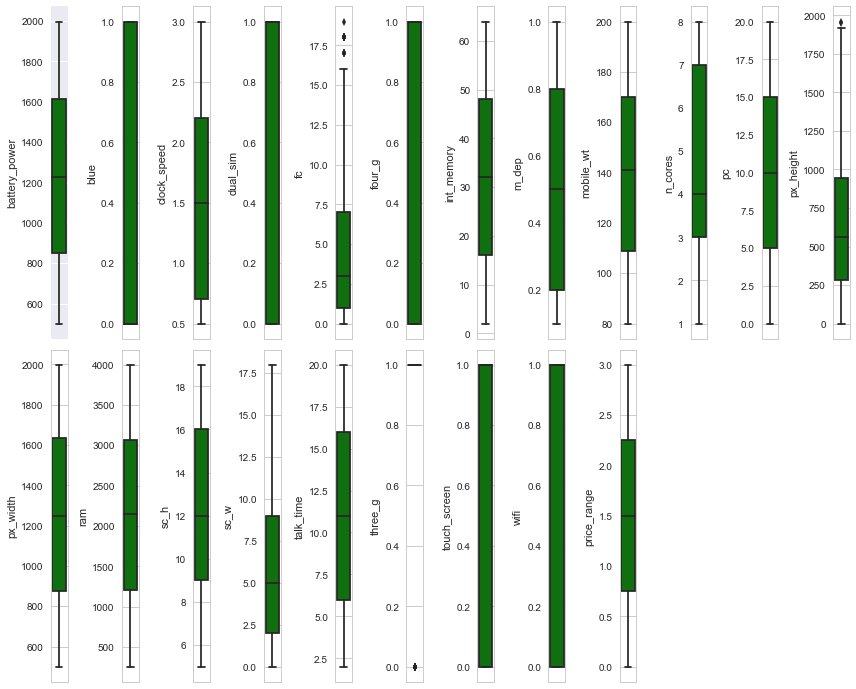

In [29]:
l = train.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(train[l[i]],color='green',orient='v')
    plt.tight_layout()

## Selecting the features

### univariate selection

In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
 
names = train.columns

train_x=train.ix[:,train.columns != 'price_range']
train_y = train.price_range
for n in range(0, len(names)-1):
    testK = SelectKBest(score_func=chi2, k=9)
    fit = testK.fit(train_x, train_y)
    print(" %s : %.2f") % (names[n], fit.scores_[n])

 battery_power : 14129.87
 blue : 0.72
 clock_speed : 0.65
 dual_sim : 0.63
 fc : 10.14
 four_g : 1.52
 int_memory : 89.84
 m_dep : 0.75
 mobile_wt : 95.97
 n_cores : 9.10
 pc : 9.19
 px_height : 17363.57
 px_width : 9810.59
 ram : 931267.52
 sc_h : 9.61
 sc_w : 16.48
 talk_time : 13.24
 three_g : 0.33
 touch_screen : 1.93
 wifi : 0.42


The chosen features are the ones with highest scores:
1. ram
2. px_height
3. battery_power
4. px_width

## Building the models

### Applying Logistic regression with Kbest features

In [31]:
X = train[['ram','px_height','battery_power','px_width']]
y = train.price_range

In [32]:
X.columns

Index([u'ram', u'px_height', u'battery_power', u'px_width'], dtype='object')

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
lrc = LogisticRegression()

In [35]:
lrc.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predicting on holdout training data

In [36]:
y_pred_lr = lrc.predict(X_test)

In [37]:
acc_lr_test_best= metrics.accuracy_score(y_test,y_pred_lr)
acc_lr_test_best

0.80000000000000004

In [38]:
print metrics.classification_report(y_test, y_pred_lr)

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       169
          1       0.75      0.66      0.70       162
          2       0.70      0.54      0.61       162
          3       0.80      1.00      0.89       167

avg / total       0.79      0.80      0.79       660



[[166   3   0   0]
 [ 18 107  37   0]
 [  0  32  88  42]
 [  0   0   0 167]]


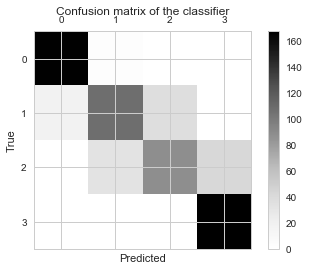

In [39]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Predicting on test data

In [40]:
X = test[['ram','px_height','battery_power','px_width']]

In [41]:
pred_lr = lrc.predict(X)

In [42]:
## make submission
sub = pd.read_csv('sample.csv')

In [43]:
sub['price_range'] = pred_lr
sub['price_range'] = sub['price_range'].astype(int)
sub.to_csv('sub1_bestk_lr.csv', index=False)

### Applying logistic regression with all the features

In [44]:
X=train.ix[:,train.columns != 'price_range']
y = train.price_range

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
lrc = LogisticRegression()

In [47]:
lrc.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
y_pred_lr_raw = lrc.predict(X_test)

In [49]:
acc_lr_test_raw= metrics.accuracy_score(y_test,y_pred_lr_raw)
acc_lr_test_raw

0.79242424242424248

In [50]:
print metrics.classification_report(y_test, y_pred_lr_raw)

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       169
          1       0.72      0.63      0.67       162
          2       0.65      0.60      0.62       162
          3       0.84      0.96      0.90       167

avg / total       0.78      0.79      0.79       660



[[163   5   1   0]
 [ 14 102  46   0]
 [  0  34  97  31]
 [  0   0   6 161]]


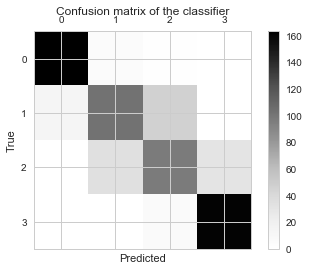

In [51]:
cm = confusion_matrix(y_test, y_pred_lr_raw)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Applying randomforest classifier

In [52]:
X=train.ix[:,train.columns != 'price_range']
y = train.price_range

               importance
feature                  
ram                 0.517
battery_power       0.077
px_width            0.056
px_height           0.053
int_memory          0.036
mobile_wt           0.031
sc_w                0.029
pc                  0.029
clock_speed         0.025
talk_time           0.024
fc                  0.023
sc_h                0.023
m_dep               0.022
n_cores             0.020
touch_screen        0.007
four_g              0.006
dual_sim            0.006
three_g             0.005
wifi                0.005
blue                0.004


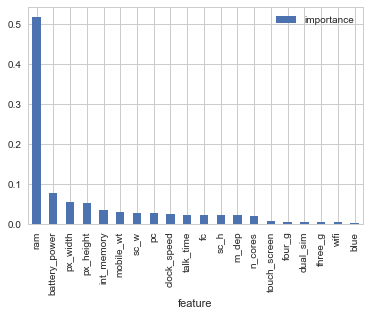

In [53]:
rfc = RandomForestClassifier()
rfc.fit(X, y)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print importances
importances.plot.bar()

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
 
# make predictions for test data and evaluate
pred_y = model.predict(X_test)
predictions = [round(value) for value in pred_y]
accuracy = metrics.accuracy_score(y_test, predictions)
print("RFC Accuracy: %.2f%%" % (accuracy * 100.0))

RFC Accuracy: 81.36%


#### Finding the best features by varying the threshold

In [56]:
# fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_train_x = selection.transform(X_train)
    
    # training model
    selection_model = RandomForestClassifier()
    selection_model.fit(select_train_x, y_train)
    
    # evaluating model
    select_test_x = selection.transform(X_test)
    pred_y = selection_model.predict(select_test_x)
    predictions = [round(value) for value in pred_y]
    accuracy = metrics.accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_train_x.shape[1], accuracy*100.0))

Thresh=0.005, n=20, Accuracy: 78.48%
Thresh=0.005, n=19, Accuracy: 79.24%
Thresh=0.006, n=18, Accuracy: 84.85%
Thresh=0.006, n=17, Accuracy: 84.70%
Thresh=0.007, n=16, Accuracy: 82.88%
Thresh=0.007, n=15, Accuracy: 79.24%
Thresh=0.019, n=14, Accuracy: 81.36%
Thresh=0.023, n=13, Accuracy: 81.06%
Thresh=0.023, n=12, Accuracy: 84.85%
Thresh=0.027, n=11, Accuracy: 83.48%
Thresh=0.030, n=10, Accuracy: 85.61%
Thresh=0.030, n=9, Accuracy: 89.09%
Thresh=0.030, n=8, Accuracy: 85.30%
Thresh=0.031, n=7, Accuracy: 86.36%
Thresh=0.040, n=6, Accuracy: 86.36%
Thresh=0.041, n=5, Accuracy: 88.64%
Thresh=0.058, n=4, Accuracy: 90.76%
Thresh=0.066, n=3, Accuracy: 86.97%
Thresh=0.080, n=2, Accuracy: 77.42%
Thresh=0.468, n=1, Accuracy: 68.48%


In [57]:
selection = SelectFromModel(model, threshold=0.05, prefit=True)

In [58]:
feature_idx= selection.get_support()

In [59]:
feature_names = X_train.columns[feature_idx]

In [60]:
feature_names

Index([u'battery_power', u'px_height', u'px_width', u'ram'], dtype='object')

#### Building random forest model with best features

In [61]:
X = train[['ram','px_height','battery_power','px_width']]
y = train.price_range

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predict on holdout training data

In [64]:
y_pred_rfc_best = model.predict(X_test)

In [65]:
acc_lr_test_best= metrics.accuracy_score(y_test,y_pred_rfc_best)
acc_lr_test_best

0.90151515151515149

In [66]:
print metrics.classification_report(y_test, y_pred_rfc_best)

             precision    recall  f1-score   support

          0       0.95      0.93      0.94       169
          1       0.86      0.91      0.88       162
          2       0.86      0.86      0.86       162
          3       0.95      0.89      0.92       167

avg / total       0.90      0.90      0.90       660



[[158  11   0   0]
 [  9 148   5   0]
 [  0  14 140   8]
 [  0   0  18 149]]


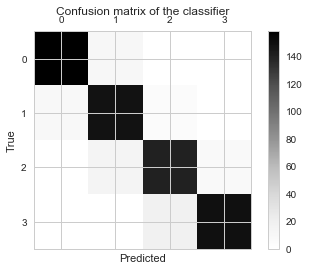

In [67]:
cm = confusion_matrix(y_test, y_pred_rfc_best)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Predict on test data

In [68]:
X = test[['ram','px_height','battery_power','px_width']]

In [69]:
pred_rf = model.predict(X)

In [70]:
## make submission
sub = pd.read_csv('sample.csv')

In [71]:
sub['price_range'] = pred_rf
sub['price_range'] = sub['price_range'].astype(int)
sub.to_csv('sub1_bestk_rf.csv', index=False)

### Applying Gradient Boosting Classifier

In [72]:
X=train.ix[:,train.columns != 'price_range']
y = train.price_range

               importance
feature                  
ram                 0.549
battery_power       0.151
px_width            0.096
px_height           0.088
mobile_wt           0.036
int_memory          0.021
m_dep               0.011
n_cores             0.009
sc_w                0.008
pc                  0.008
talk_time           0.007
sc_h                0.005
fc                  0.004
wifi                0.003
clock_speed         0.002
blue                0.001
four_g              0.001
dual_sim            0.001
three_g             0.000
touch_screen        0.000


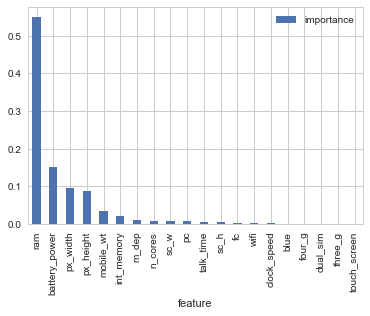

In [73]:
gbc = GradientBoostingClassifier()
gbc.fit(X, y)
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(gbc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
 
print importances
importances.plot.bar()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [75]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
 
# make predictions for test data and evaluate
pred_y = gbc_model.predict(X_test)
predictions = [round(value) for value in pred_y]
accuracy = metrics.accuracy_score(y_test, predictions)
print("RFC Accuracy: %.2f%%" % (accuracy * 100.0))

RFC Accuracy: 88.94%


#### Finding the best features by varying the threshold

In [76]:
# fit model using each importance as a threshold
thresholds = sort(gbc_model.feature_importances_)
for thresh in thresholds:
    # selecting features using threshold
    selection = SelectFromModel(gbc_model, threshold=thresh, prefit=True)
    select_train_x = selection.transform(X_train)
    
    # training model
    selection_model = GradientBoostingClassifier()
    selection_model.fit(select_train_x, y_train)
    
    # evaluating model
    select_test_x = selection.transform(X_test)
    pred_y = selection_model.predict(select_test_x)
    predictions = [round(value) for value in pred_y]
    accuracy = metrics.accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_train_x.shape[1], accuracy*100.0))

Thresh=0.000, n=20, Accuracy: 88.94%
Thresh=0.001, n=19, Accuracy: 88.94%
Thresh=0.001, n=18, Accuracy: 89.09%
Thresh=0.002, n=17, Accuracy: 88.94%
Thresh=0.003, n=16, Accuracy: 88.48%
Thresh=0.004, n=15, Accuracy: 89.24%
Thresh=0.005, n=14, Accuracy: 89.39%
Thresh=0.005, n=13, Accuracy: 88.48%
Thresh=0.008, n=12, Accuracy: 88.79%
Thresh=0.009, n=11, Accuracy: 88.94%
Thresh=0.011, n=10, Accuracy: 88.18%
Thresh=0.012, n=9, Accuracy: 88.79%
Thresh=0.012, n=8, Accuracy: 88.33%
Thresh=0.013, n=7, Accuracy: 89.24%
Thresh=0.031, n=6, Accuracy: 89.24%
Thresh=0.042, n=5, Accuracy: 89.24%
Thresh=0.081, n=4, Accuracy: 90.30%
Thresh=0.094, n=3, Accuracy: 85.91%
Thresh=0.148, n=2, Accuracy: 80.91%
Thresh=0.518, n=1, Accuracy: 74.70%


In [77]:
selection = SelectFromModel(gbc_model, threshold=0.081, prefit=True)

In [78]:
feature_idx= selection.get_support()

In [79]:
feature_names = X_train.columns[feature_idx]
feature_names

Index([u'battery_power', u'px_height', u'px_width', u'ram'], dtype='object')

#### Building gradient boosting trees with best features

In [80]:
X = train[['ram','px_height','battery_power','px_width']]
y = train.price_range

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [82]:
gbc_model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

#### Prediting on holdout training data

In [83]:
y_pred_gbc_best = gbc_model.predict(X_test)

In [84]:
acc_gbc_test_best= metrics.accuracy_score(y_test,y_pred_gbc_best)
acc_gbc_test_best

0.90303030303030307

In [85]:
print metrics.classification_report(y_test, y_pred_gbc_best)

             precision    recall  f1-score   support

          0       0.97      0.93      0.95       169
          1       0.87      0.92      0.89       162
          2       0.85      0.85      0.85       162
          3       0.93      0.90      0.92       167

avg / total       0.90      0.90      0.90       660



[[158  11   0   0]
 [  5 149   8   0]
 [  0  12 138  12]
 [  0   0  16 151]]


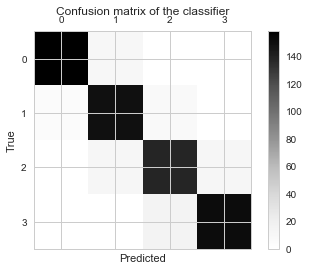

In [86]:
cm = confusion_matrix(y_test, y_pred_gbc_best)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [87]:
X = test[['ram','px_height','battery_power','px_width']]

In [88]:
pred_gb = gbc_model.predict(X)

In [89]:
## make submission
sub = pd.read_csv('sample.csv')

In [90]:
sub['price_range'] = pred_gb
sub['price_range'] = sub['price_range'].astype(int)
sub.to_csv('sub1_bestk_gb.csv', index=False)

### Tuning randomforest classifier

In [99]:
X = train[['ram','px_height','battery_power','px_width']]
y = train.price_range

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [101]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Method of selecting features
criterion: ["gini", "entropy"]

In [102]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]}


In [103]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfc = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.9min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_split': [2, 5, 10], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [98]:
X.columns

Index([u'battery_power', u'blue', u'clock_speed', u'dual_sim', u'fc',
       u'four_g', u'int_memory', u'm_dep', u'mobile_wt', u'n_cores', u'pc',
       u'px_height', u'px_width', u'ram', u'sc_h', u'sc_w', u'talk_time',
       u'three_g', u'touch_screen', u'wifi'],
      dtype='object')

In [104]:
y_pred_rfc_tuned = rfc_random.predict(X_test)

In [105]:
acc_rfc_tuned_best= metrics.accuracy_score(y_test,y_pred_rfc_tuned)
acc_rfc_tuned_best

0.91969696969696968

In [106]:
print metrics.classification_report(y_test, y_pred_rfc_tuned)

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       169
          1       0.87      0.94      0.90       162
          2       0.90      0.86      0.88       162
          3       0.94      0.93      0.94       167

avg / total       0.92      0.92      0.92       660



[[160   9   0   0]
 [  5 152   5   0]
 [  0  13 139  10]
 [  0   0  11 156]]


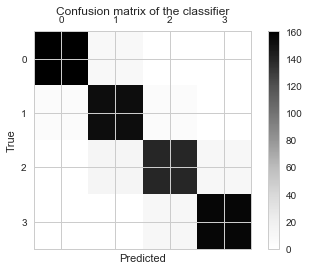

In [107]:
cm = confusion_matrix(y_test, y_pred_rfc_tuned)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [108]:
X = test[['ram','px_height','battery_power','px_width']]

In [109]:
pred_rfc_tuned = rfc_random.predict(X)

In [110]:
## make submission
sub = pd.read_csv('sample.csv')

In [111]:
sub['price_range'] = pred_rfc_tuned
sub['price_range'] = sub['price_range'].astype(int)
sub.to_csv('sub1_bestk_rfc_tuned.csv', index=False)